In [5]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs
import seaborn as sns

plt.style.use('fivethirtyeight')

/Users/raficg/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def master_df(chamber):
    master = pd.DataFrame()
    fpath='../congress-data/%s/' % chamber
    files=os.listdir(fpath)
    for file in files:
        
        congress = int(file.split('_')[1].split('.')[0])
        df = pd.read_csv(fpath + file, index_col=0, parse_dates=['dob'])
        df['congress'] = congress
        
        master = master.append(df, ignore_index=True)
    
    return master

In [3]:
house = master_df('house')
senate = master_df('senate')

## Looking at House

In [16]:
house = house[house['party'].isin(['D', 'R'])]

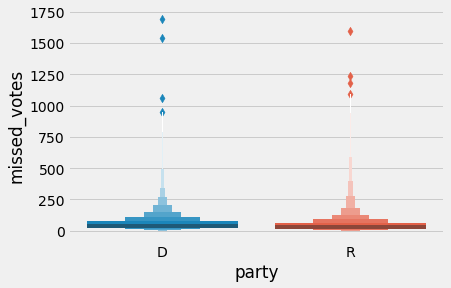

In [17]:
sns.boxenplot(x=house.party, y=house.missed_votes, data=house)

In [20]:
rep_missed = house[house['party'] == 'R']['missed_votes']
dem_missed = house[house['party'] == 'D']['missed_votes']

/Users/raficg/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


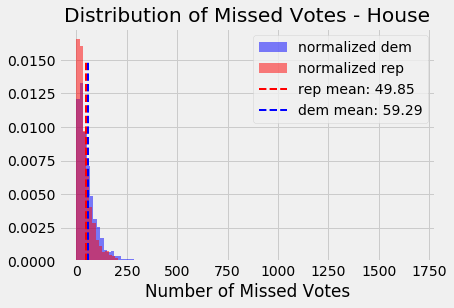

In [28]:
fig, ax = plt.subplots()

r_mean = np.mean(rep_missed)
d_mean = np.mean(dem_missed)

ax.hist(dem_missed, color='b', label='normalized dem', bins=100, normed=1, alpha=0.5)
ax.hist(rep_missed, color='r', label='normalized rep', bins=100, normed=1, alpha=0.5)
ax.vlines(r_mean, 0, 0.015, color='r', linestyle='--', linewidth=2, label='rep mean: %.2f' % r_mean)
ax.vlines(d_mean, 0, 0.015, color='b', linestyle='--', linewidth=2, label='dem mean: %.2f' % d_mean)
ax.legend()
ax.set_xlabel('Number of Missed Votes');
ax.set_title('Distribution of Missed Votes - House');

In [29]:
print('Rep Sample Size: %d' % len(rep_missed))
print('Dem Sample Size: %d' % len(dem_missed))

Rep Sample Size: 3321
Dem Sample Size: 3323


In a given session of Congress, Democratic representatives miss 59.29 votes on average, while Republican representatives miss 49.85 votes on average. The question is, is this significant?

$$H_0: \mu_d = \mu_r$$
$$H_a: \mu_d > \mu_r$$

We want to run a 2-tail t-test. Our alpha threshold will be 0.05.

In [30]:
t_stat, p_val = scs.ttest_ind(rep_missed, dem_missed)
print(p_val)

1.8199462034975657e-06


Conclusion: Democrat representatives miss more votes on average then Republican's, and this is statistically. significant.

## Looking at Senate

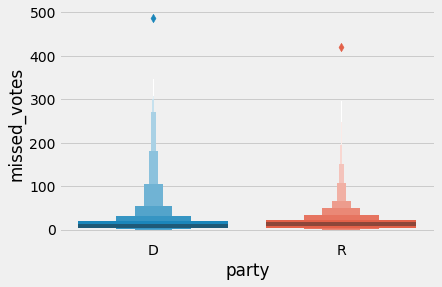

In [32]:
senate = senate[senate['party'].isin(['D', 'R'])]
sns.boxenplot(x=senate.party, y=senate.missed_votes, data=senate)

In [33]:
rep_missed = senate[senate['party'] == 'R']['missed_votes']
dem_missed = senate[senate['party'] == 'D']['missed_votes']

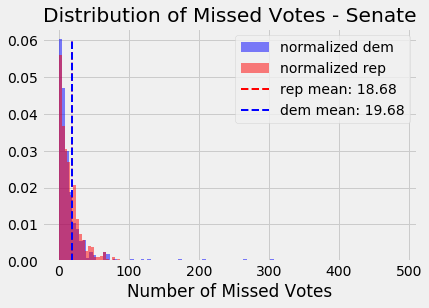

In [35]:
fig, ax = plt.subplots()

r_mean = np.mean(rep_missed)
d_mean = np.mean(dem_missed)

ax.hist(dem_missed, color='b', label='normalized dem', bins=100, normed=1, alpha=0.5)
ax.hist(rep_missed, color='r', label='normalized rep', bins=100, normed=1, alpha=0.5)
ax.vlines(r_mean, 0, 0.06, color='r', linestyle='--', linewidth=2, label='rep mean: %.2f' % r_mean)
ax.vlines(d_mean, 0, 0.06, color='b', linestyle='--', linewidth=2, label='dem mean: %.2f' % d_mean)
ax.legend()
ax.set_xlabel('Number of Missed Votes');
ax.set_title('Distribution of Missed Votes - Senate');

In [36]:
print('Rep Sample Size: %d' % len(rep_missed))
print('Dem Sample Size: %d' % len(dem_missed))

Rep Sample Size: 815
Dem Sample Size: 815


In a given session of Congress, Democratic Senators miss 19.68 votes on average, while Republican Senators miss 18.68 votes on average. The question is, is this significant?

$$H_0: \mu_d = \mu_r$$
$$H_a: \mu_d > \mu_r$$

We want to run a 2-tail t-test. Our alpha threshold will be 0.05.

In [40]:
t_stat, p_val = scs.ttest_ind(rep_missed, dem_missed)
print(p_val)

0.5635284558111554


Conclusion: There is no statistical significance between the number of missed votes by Republican and Democratic senators.